<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-4/blob/main/notebooks/V1_1_plot_basic_AEncoder_latent_layer_FZ_AIML425_Assn_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import plotly.express as px

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1. Generate 3D data

In [12]:
def generate_points_on_cube_surface(n_points_per_face):
    """
    Generate points uniformly distributed over the surface of a cube.

    Parameters:
    - n_points_per_face: Number of points to generate on each face of the cube.

    Returns:
    - points: (3, 6*n_points_per_face) array of points on the cube surface.
    """
    faces = []
    for _ in range(6):
        face = np.random.rand(3, n_points_per_face)
        axis = _ // 2  # 0: x, 1: y, 2: z
        face[axis, :] = (_ % 2)  # 0 or 1, depending on the face
        faces.append(face)
    return np.hstack(faces)

n_points_per_face = 1000
points = generate_points_on_cube_surface(n_points_per_face)

fig = px.scatter_3d(x=points[0], y=points[1], z=points[2], opacity=0.5)
fig.show()


# 2. Create a dataset and dataloaders

In [13]:
points = points.T  # Transpose to have shape (n_samples, 3)

# 2. Create a dataset and dataloaders
dataset = TensorDataset(torch.tensor(points, dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 3. Define and train the autoencoder

In [36]:
import torch.nn as nn
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self, bottleneck_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3, 128),
            nn.ReLU(),
            nn.Linear(128, bottleneck_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

    # def plot_bottleneck_distribution(self, dataloader):
    #     all_outputs = []
    #     with torch.no_grad():
    #         for batch in dataloader:
    #             data = batch[0]
    #             encoded = self.encode(data).numpy()
    #             all_outputs.extend(encoded)

    #     all_outputs = np.array(all_outputs)

    #     # Assuming the bottleneck_dim is 2 for simplicity in plotting
    #     if all_outputs.shape[1] == 2:
    #         plt.scatter(all_outputs[:, 0], all_outputs[:, 1], alpha=0.5)
    #         plt.xlabel('Dimension 1')
    #         plt.ylabel('Dimension 2')
    #         plt.title('Bottleneck Layer Distribution')
    #         plt.show()
    #     else:
    #         print("Bottleneck dimension is not 2. Can't plot 2D scatter.")

    def plot_bottleneck_distribution(self, dataloader):
        all_outputs = []
        with torch.no_grad():
            for batch in dataloader:
                data = batch[0]
                encoded = self.encode(data).cpu().numpy()
                all_outputs.extend(encoded)

        all_outputs = np.array(all_outputs)

        # Number of dimensions in the bottleneck layer
        num_dims = all_outputs.shape[1]

        # Plot histograms for each dimension
        fig, axs = plt.subplots(num_dims, 1, figsize=(10, 4*num_dims))

        for i in range(num_dims):
            if num_dims == 1:
                ax = axs
            else:
                ax = axs[i]
            ax.hist(all_outputs[:, i], bins=50, alpha=0.7)
            ax.set_title(f'Distribution of Dimension {i+1}')
            ax.set_xlabel(f'Value')
            ax.set_ylabel(f'Frequency')

        plt.tight_layout()
        plt.show()


In [54]:
def train_autoencoder():
    bottleneck_dim = 7
    model = Autoencoder(bottleneck_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 10
    for epoch in range(num_epochs):
        for data, in dataloader:
            outputs = model(data)
            loss = criterion(outputs, data)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
    model.plot_bottleneck_distribution(dataloader)

## Train Auto encoder Round 1

Epoch [1/10], Loss: 0.0003
Epoch [2/10], Loss: 0.0001
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


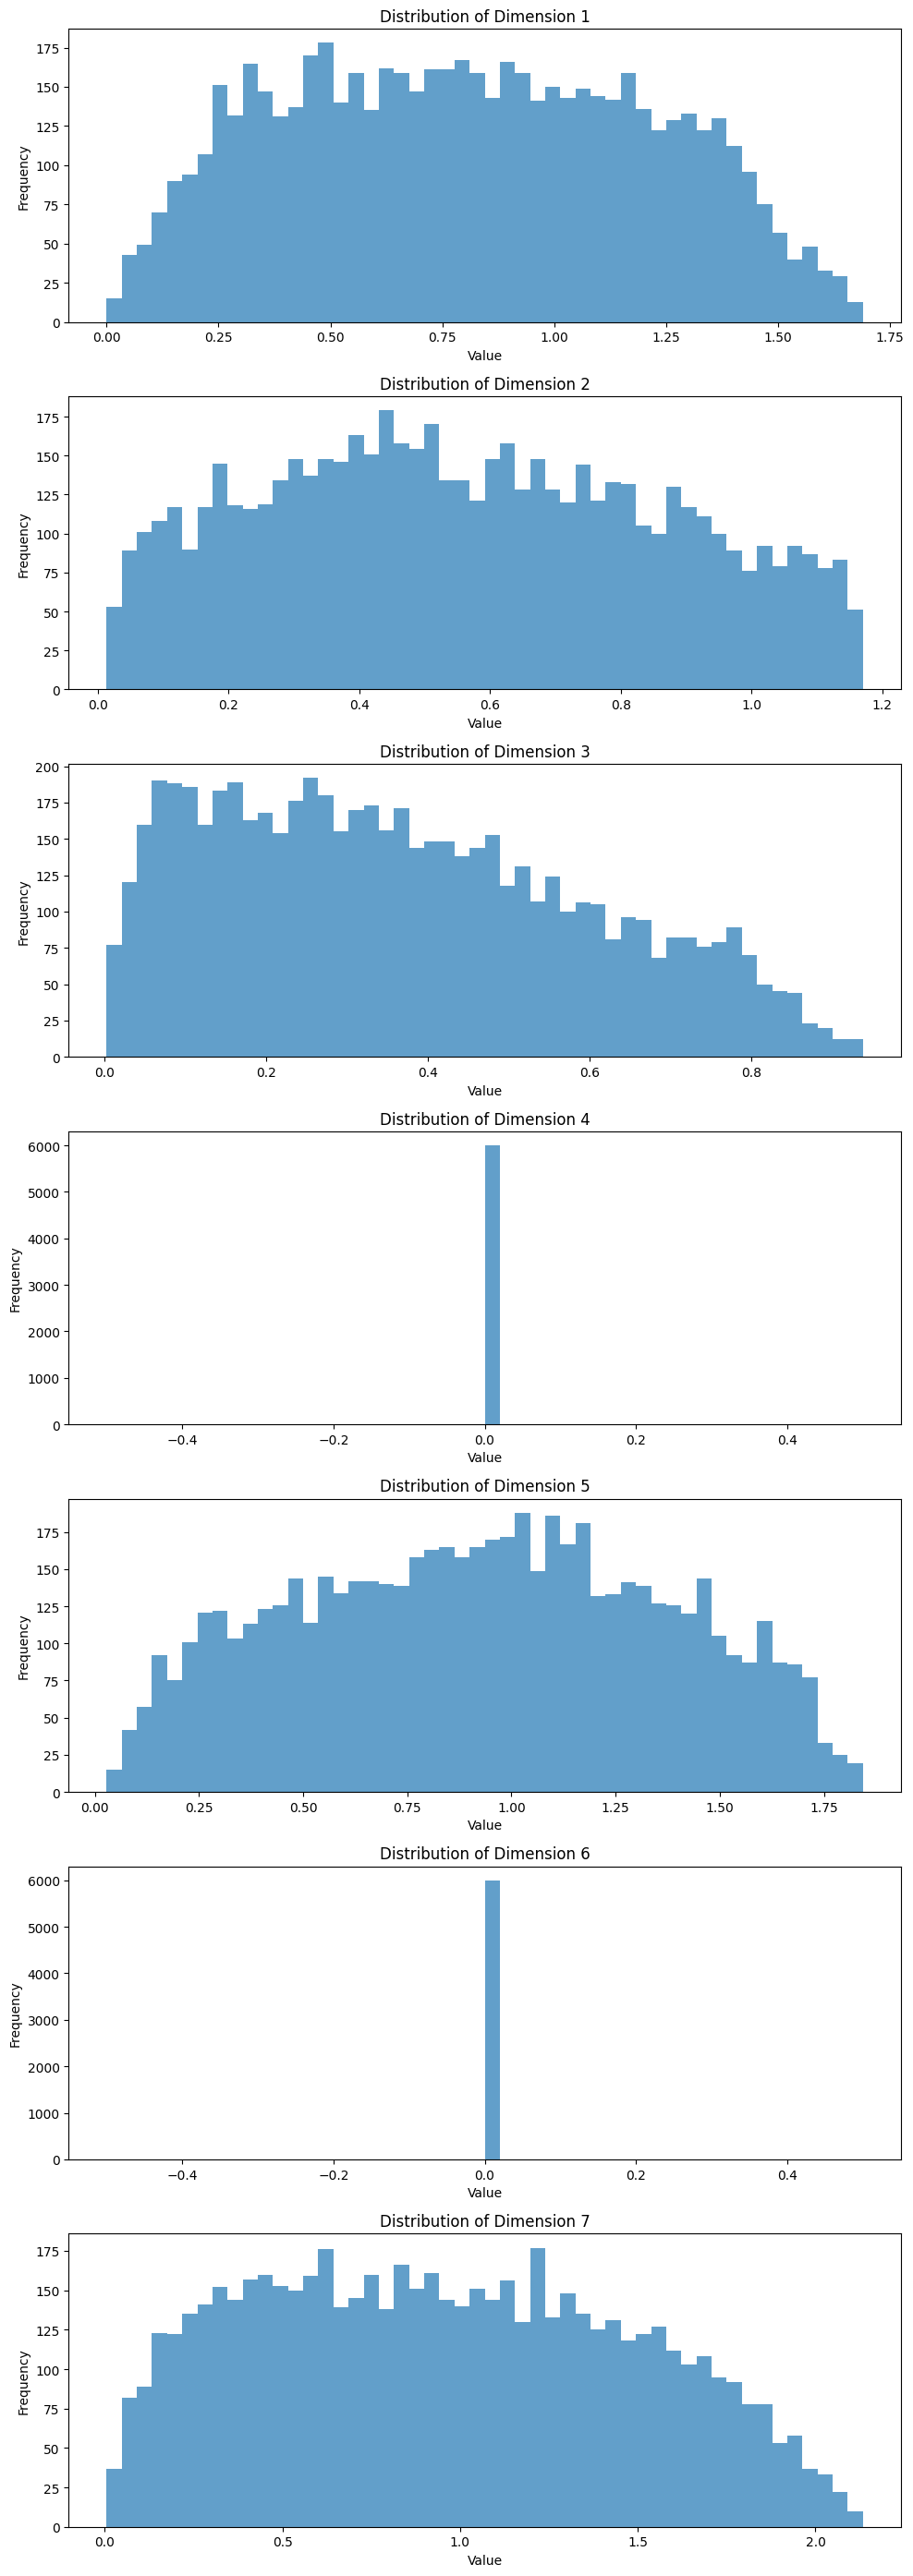

In [55]:
train_autoencoder()

## Train Auto encoder Round 2

Epoch [1/10], Loss: 0.0002
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


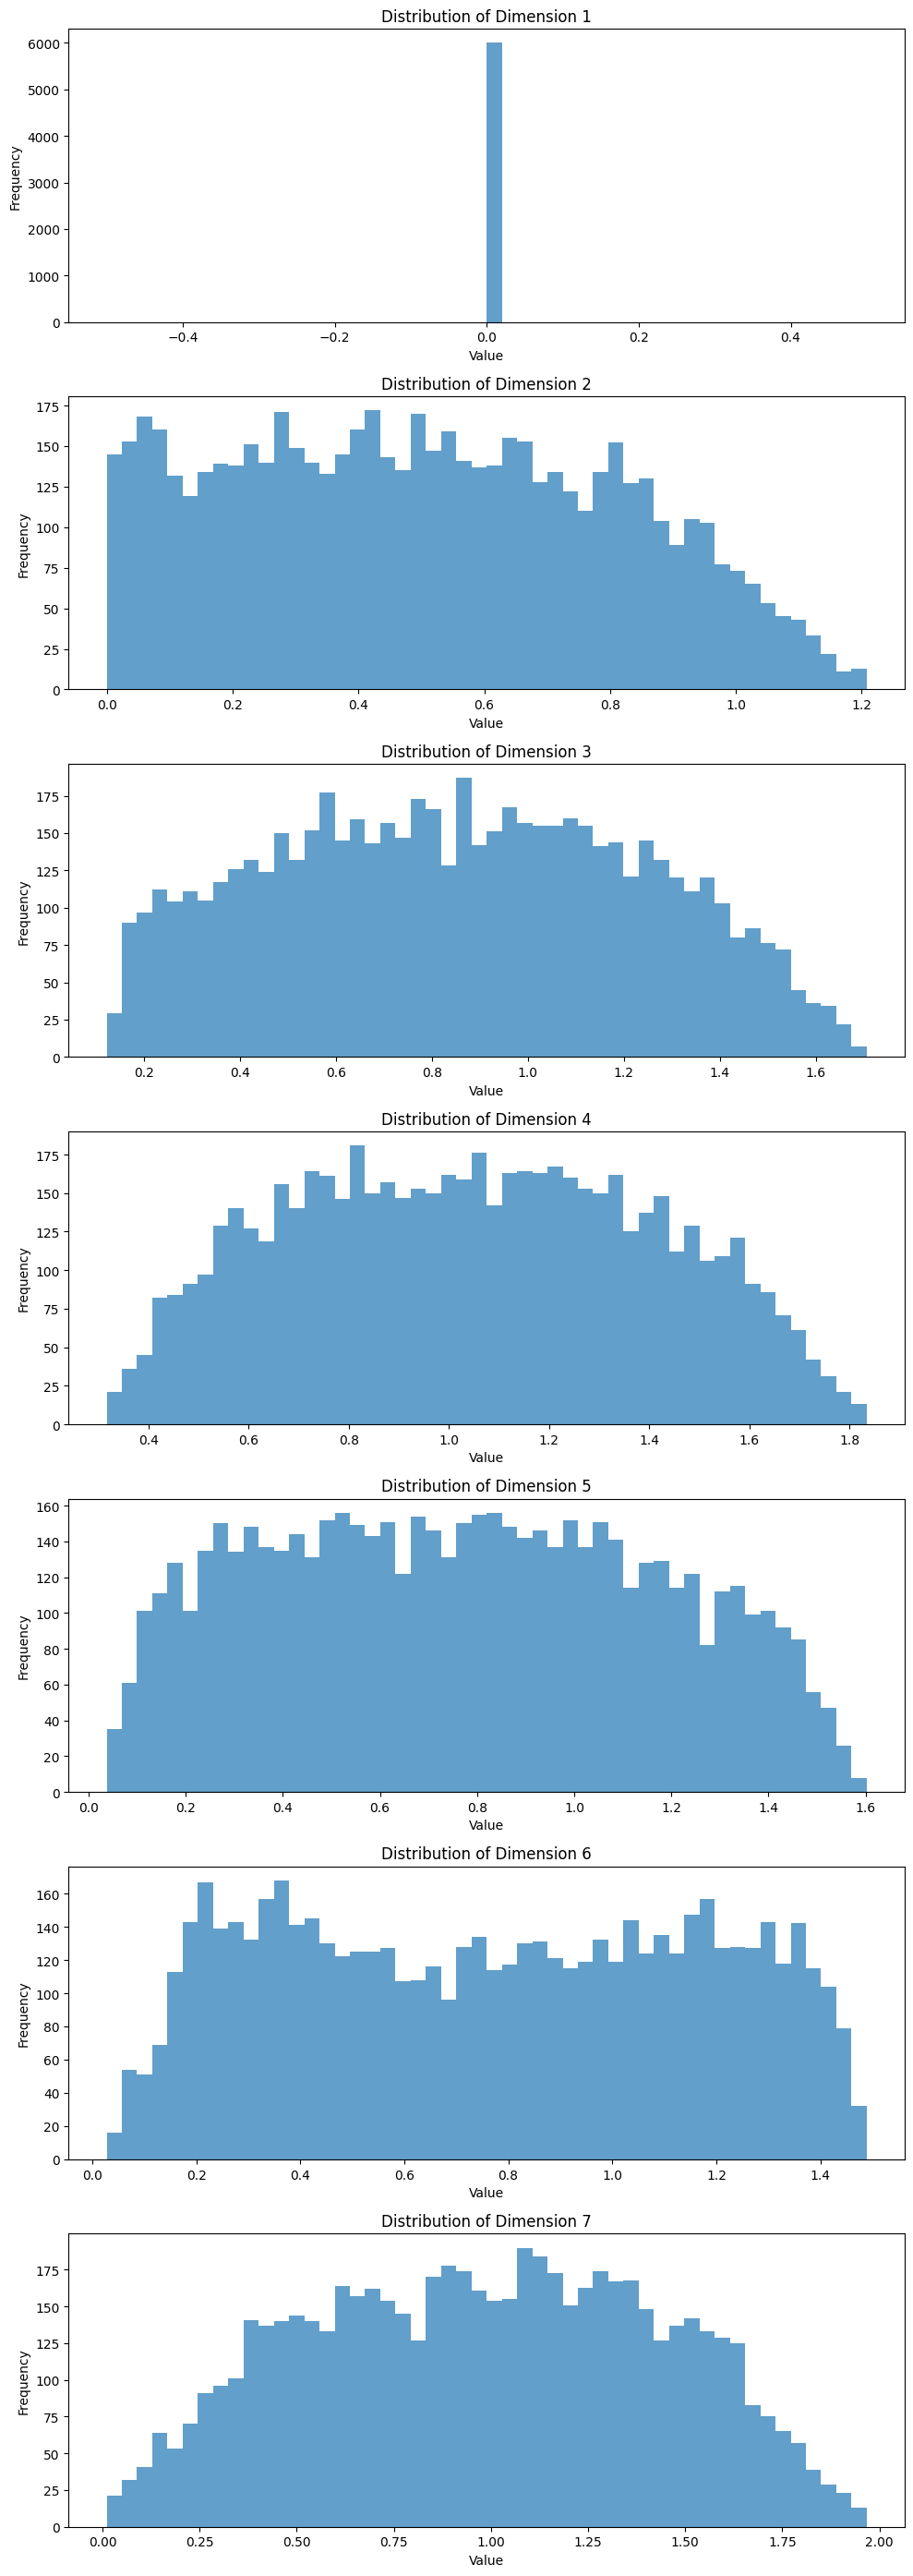

In [56]:
train_autoencoder()

# 4. Evaluate the autoencoder

In [57]:
bottleneck_dim = 7
model = Autoencoder(bottleneck_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for data, in dataloader:
        outputs = model(data)
        loss = criterion(outputs, data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0009
Epoch [2/10], Loss: 0.0001
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0001
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000


In [58]:
model.eval()
with torch.no_grad():
    reconstructed = model(torch.tensor(points, dtype=torch.float32)).numpy()


## Visualize original and reconstructed points

In [43]:
# fig = px.scatter_3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], opacity=0.5, title="Original Points")
# fig.show()

In [59]:
fig = px.scatter_3d(x=reconstructed[:, 0], y=reconstructed[:, 1], z=reconstructed[:, 2], opacity=0.5, title="Reconstructed Points")
fig.show()